In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_path = '/content/kaggle_startups_train_28062024.csv'  # Replace with your file path
test_path = '/content/kaggle_startups_test_28062024.csv'  # Replace with your file path
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# --- EDA STARTS HERE ---

In [2]:
# 1. Overview of the datasets
# Basic information about the train and test datasets
print("Train Dataset Info:\n")
print(train_data.info())
print("\nTest Dataset Info:\n")
print(test_data.info())

Train Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
 13  lifespan_days      4917 non-null   float

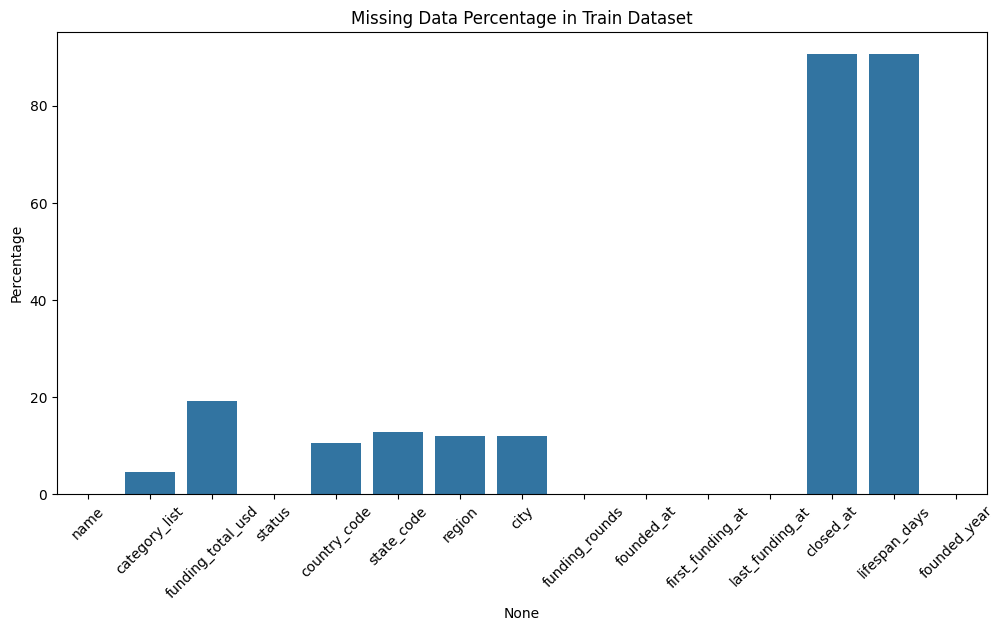

In [4]:
# --- Missing Values Analysis ---
missing_train = train_data.isnull().mean() * 100
missing_test = test_data.isnull().mean() * 100

# Plot missing data percentage for train dataset
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_train.index, y=missing_train.values)
plt.xticks(rotation=45)
plt.title("Missing Data Percentage in Train Dataset")
plt.ylabel("Percentage")
plt.show()

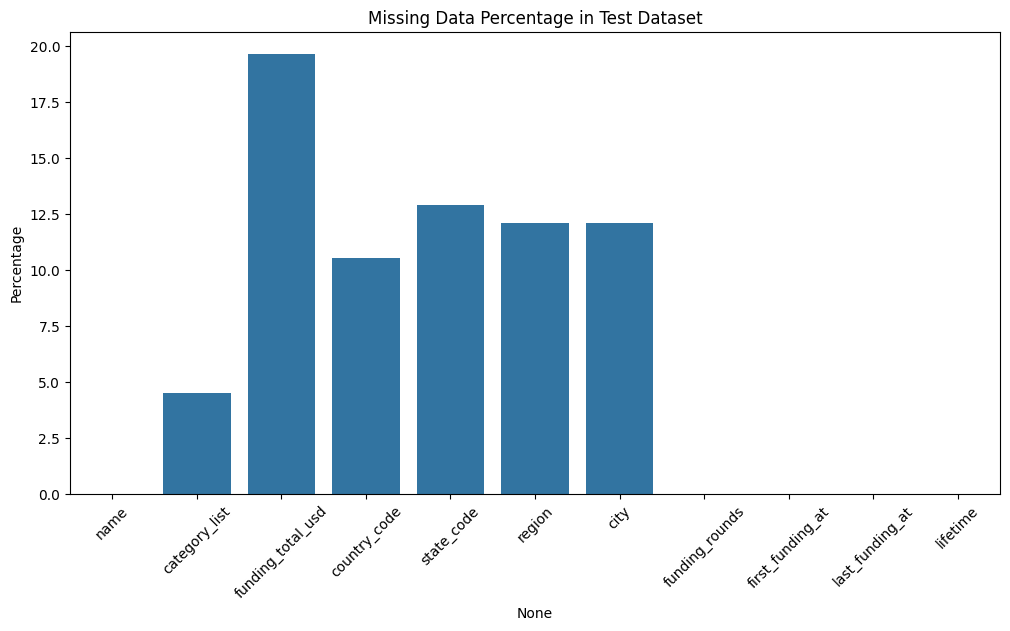

In [5]:
# Plot missing data percentage for test dataset
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_test.index, y=missing_test.values)
plt.xticks(rotation=45)
plt.title("Missing Data Percentage in Test Dataset")
plt.ylabel("Percentage")
plt.show()

In [6]:
# --- Descriptive Statistics ---
# Numerical features statistics
print("\nDescriptive Statistics for Train Dataset:\n")
print(train_data.describe())



Descriptive Statistics for Train Dataset:

       funding_total_usd  funding_rounds                     founded_at  \
count       4.244700e+04    52516.000000                          52516   
mean        1.824748e+07        1.740670  2008-11-04 09:44:16.196206848   
min         1.000000e+00        1.000000            1970-02-05 00:00:00   
25%         3.360275e+05        1.000000            2006-10-01 00:00:00   
50%         2.000000e+06        1.000000            2010-10-01 00:00:00   
75%         1.000000e+07        2.000000            2013-01-01 00:00:00   
max         3.007950e+10       19.000000            2016-04-02 00:00:00   
std         1.871173e+08        1.374522                            NaN   

                    first_funding_at                last_funding_at  \
count                          52516                          52516   
mean   2011-07-17 04:45:33.247010304  2012-06-27 16:29:42.313961472   
min              1977-05-15 00:00:00            1977-05-15 00:00:00

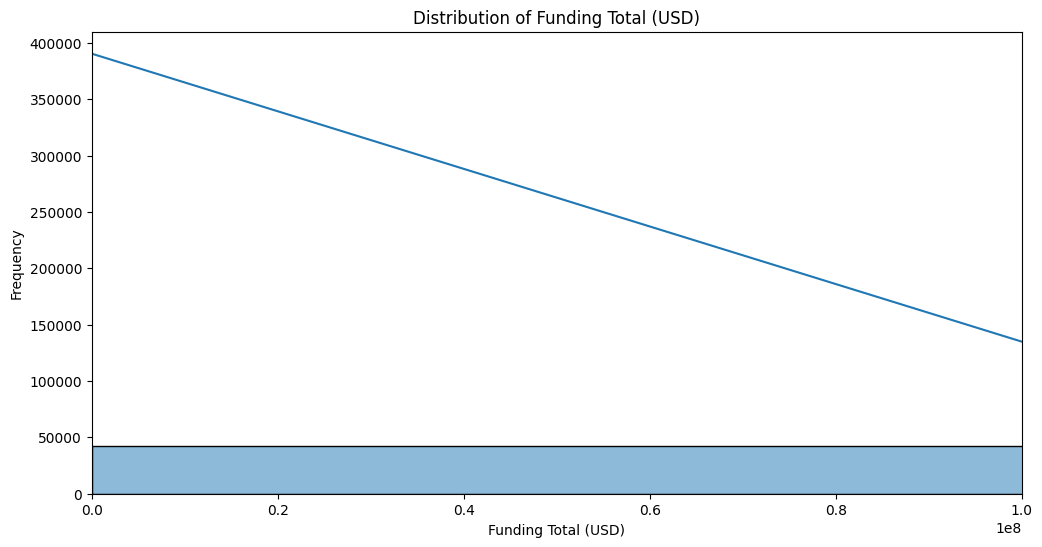

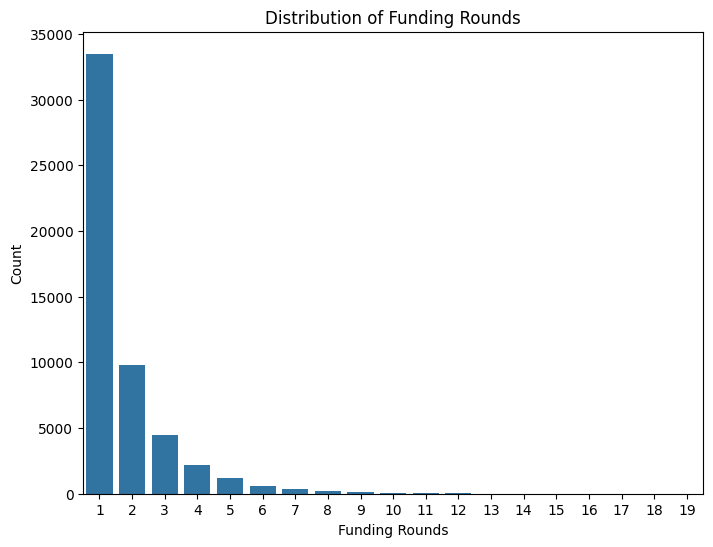

In [7]:
# --- Numerical Features Visualization ---
# Funding total distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_data['funding_total_usd'].dropna(), bins=50, kde=True)
plt.title("Distribution of Funding Total (USD)")
plt.xlabel("Funding Total (USD)")
plt.ylabel("Frequency")
plt.xlim(0, 1e8)  # Focus on main distribution
plt.show()

# Funding rounds distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_data['funding_rounds'])
plt.title("Distribution of Funding Rounds")
plt.xlabel("Funding Rounds")
plt.ylabel("Count")
plt.show()

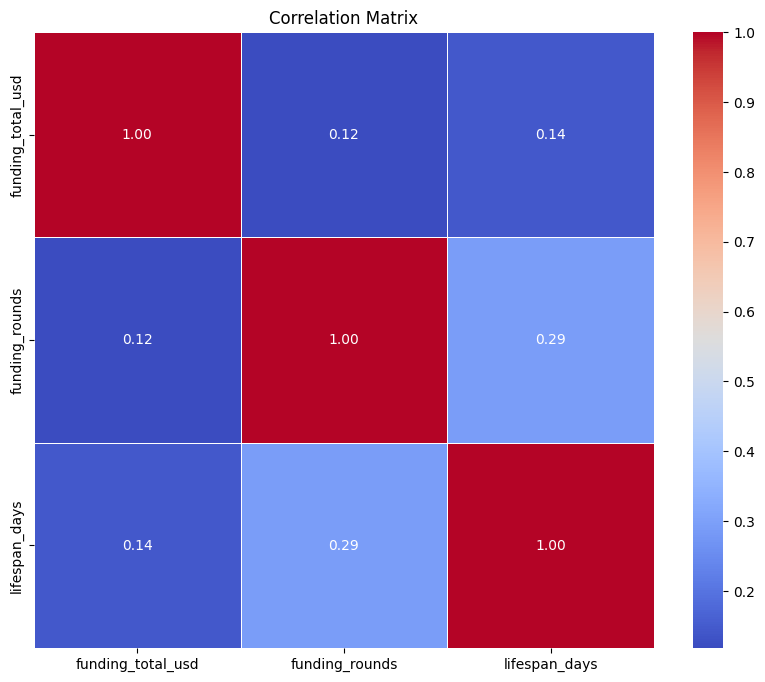

In [8]:
# Correlation heatmap for numerical features
numerical_features = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

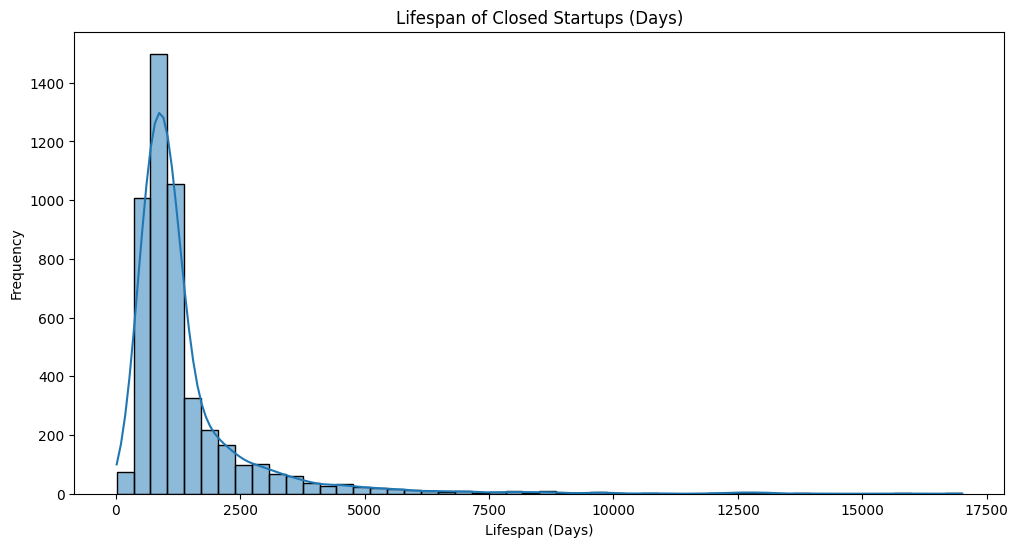

In [10]:
# --- Temporal Analysis ---
# Convert date columns to datetime
train_data['founded_at'] = pd.to_datetime(train_data['founded_at'], errors='coerce')
train_data['first_funding_at'] = pd.to_datetime(train_data['first_funding_at'], errors='coerce')
train_data['last_funding_at'] = pd.to_datetime(train_data['last_funding_at'], errors='coerce')
train_data['closed_at'] = pd.to_datetime(train_data['closed_at'], errors='coerce')

# Calculate lifespan (in days) for closed startups
train_data['lifespan_days'] = (train_data['closed_at'] - train_data['founded_at']).dt.days

# Lifespan distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_data['lifespan_days'].dropna(), bins=50, kde=True)
plt.title("Lifespan of Closed Startups (Days)")
plt.xlabel("Lifespan (Days)")
plt.ylabel("Frequency")
plt.show()

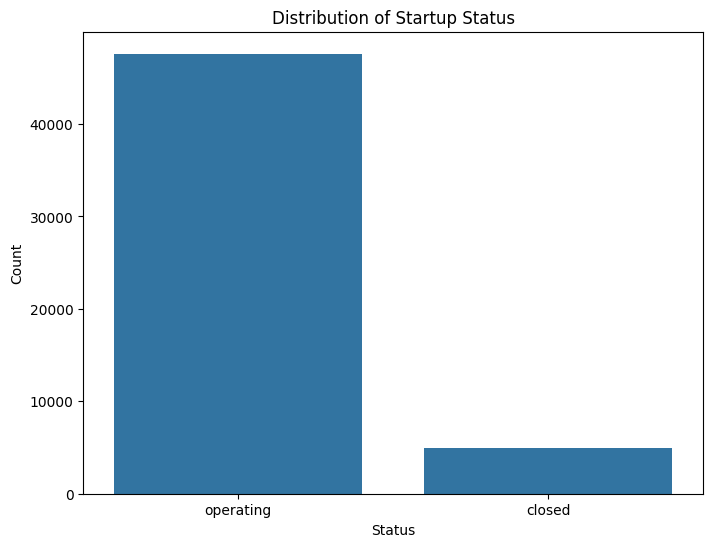

In [11]:
# --- Categorical Features Analysis ---
# Startup status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_data['status'], order=train_data['status'].value_counts().index)
plt.title("Distribution of Startup Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

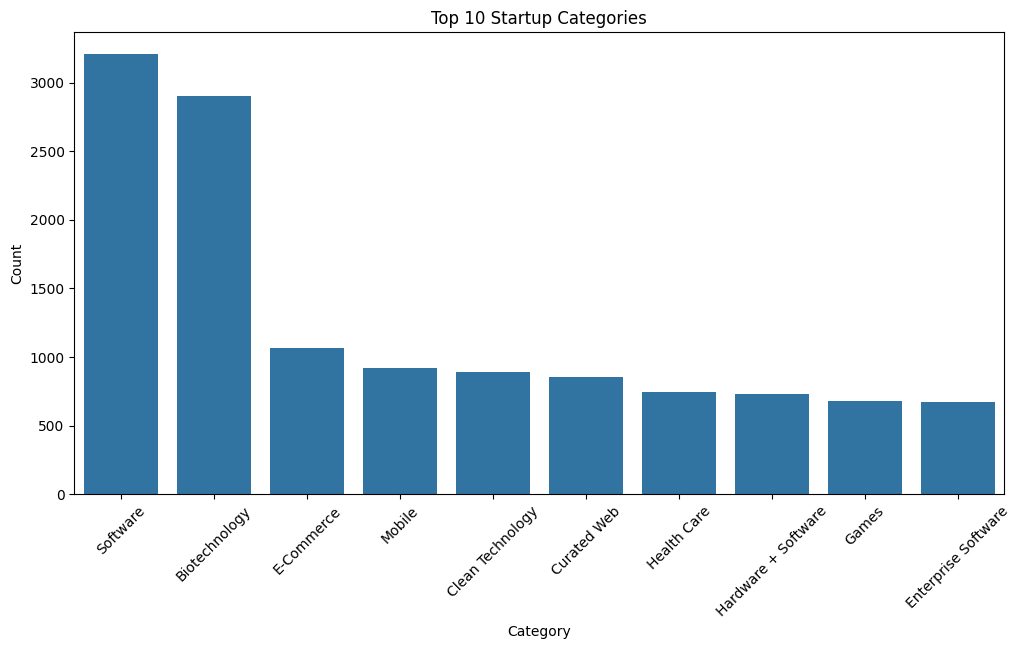

In [12]:
# Top 10 categories in 'category_list'
top_categories = train_data['category_list'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top 10 Startup Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

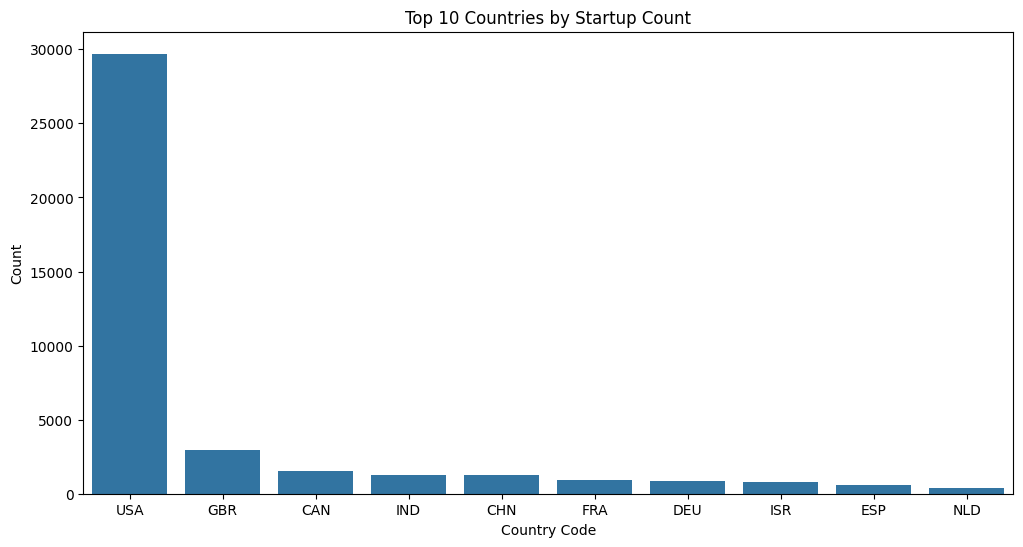

In [13]:
# Top 10 countries
top_countries = train_data['country_code'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Startup Count")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.show()

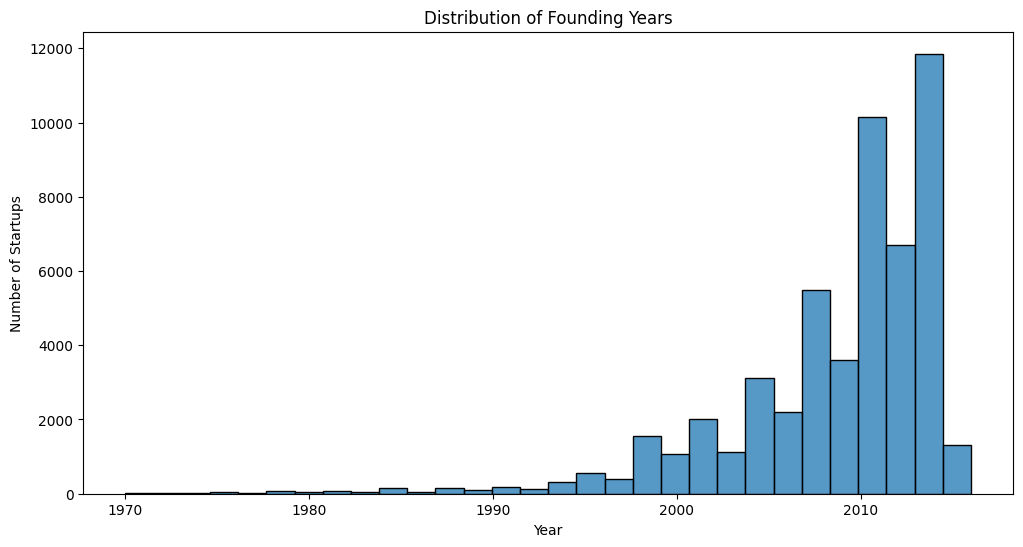

In [14]:
# Founding year distribution
train_data['founded_year'] = train_data['founded_at'].dt.year

plt.figure(figsize=(12, 6))
sns.histplot(train_data['founded_year'].dropna(), bins=30, kde=False)
plt.title("Distribution of Founding Years")
plt.xlabel("Year")
plt.ylabel("Number of Startups")
plt.show()